In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style()

from objective import black_box
from script import optimize

import json
with open('params.txt') as q:
        params = json.load(q)
        globals().update(params)

/opt/conda/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


**Let us define initial training set**

In [2]:
initial_size = 30
n_calls = 200
x0 = np.random.uniform(low=low, high=high, size=[initial_size, dim]).tolist()
y0 = np.array([black_box(t) for t in x0]).tolist()

**Optimization process**

In our toy example objective is $f(x_1, \ldots, x_n) = 30 + \sum_{i=1}^{30} \sin(x_i)$, where $x_i \in [\pi, 2\pi]$, i.e. it's global minimum is $f(0, \ldots, 0) = 0$

In [3]:
%%time
x, y = optimize(x0, y0, n_calls)    

CPU times: user 11min 57s, sys: 26min 6s, total: 38min 3s
Wall time: 5min 34s


**We will compare Bayesian optimization with naive grid search**

In [4]:
x_random_grid = np.random.uniform(low=low, high=high, size=[n_calls, dim])
y_random_grid = np.append(y0, [black_box(t) for t in x_random_grid], axis=0)

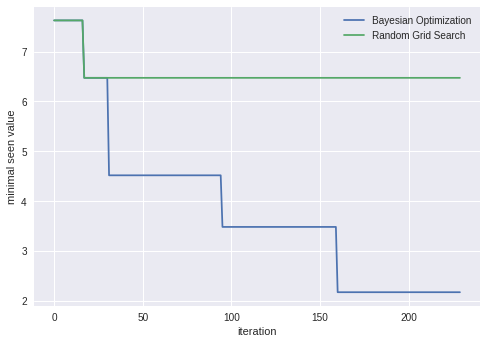

In [5]:
plt.plot(np.minimum.accumulate(y), label='Bayesian Optimization')
plt.plot(np.minimum.accumulate(y_random_grid), label='Random Grid Search')
plt.xlabel('iteration')
plt.ylabel('minimal seen value')
plt.legend()
plt.show()